# 🛍️ Customer Segmentation on Walmart Transactions
Customer segmentation helps businesses group customers based on shopping behaviors to personalize marketing strategies, pricing, and product recommendations.
## 📌 Objective
Customer segmentation helps businesses **group customers based on shopping behaviors** to personalize marketing strategies, pricing, and product recommendations.  
We will use **K-Means Clustering** to segment customers based on their spending and shopping preferences.

## Steps for Customer Segmentation

* Feature Selection – Choose relevant features for segmentation.
* Data Preprocessing – Clean and standardize the data.
* Exploratory Data Analysis (EDA) – Understand spending patterns.
* Apply Clustering Algorithms – K-Means, Hierarchical, or DBSCAN.
* Visualize Clusters – Interpret customer groups.
* Business Insights & Recommendations – Provide action points.


## **1️⃣ Feature Selection**
From the dataset, we can use the following features for segmentation:

- **`Purchase_Amount`** → Total amount spent.
- **`Category`** → Preferred product categories.
- **`Payment_Method`** → Preferred payment methods.
- **`Discount_Applied`** → Sensitivity to discounts.
- **`Repeat_Customer`** → New vs. returning customers.
- **`Age` & `Gender`** → Demographic information.

These features will help us cluster customers based on their **shopping habits, preferences, and spending behavior**.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/kaggle/input/walmart-customer-purchase-behavior-dataset/Walmart_customer_purchases.csv")  # Update the correct path
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


## **2️⃣ Data Preprocessing**
Before clustering, we need to **clean and standardize** the data:

- Convert categorical features into numerical values.
- One-hot encode categorical columns (`Category`, `Payment_Method`).
- Scale numerical features (`Age`, `Purchase_Amount`, etc.) for better clustering.

In [2]:
# Convert categorical features to numerical values
df['Repeat_Customer'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features (Category & Payment Method)
df = pd.get_dummies(df, columns=['Category', 'Payment_Method'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Purchase_Amount', 'Discount_Applied', 'Repeat_Customer']])

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['Age', 'Purchase_Amount', 'Discount_Applied', 'Repeat_Customer'])
df_scaled.head()

,Age,Purchase_Amount,Discount_Applied,Repeat_Customer
0,0.810999,-0.016050,-0.99928,0.990287
1,-0.237556,-1.287973,1.00072,-1.009808
2,1.052974,-0.917634,1.00072,-1.009808
3,0.649683,1.375882,-0.99928,0.990287
4,0.327051,0.803457,1.00072,0.990287


## 3️⃣ Finding the Optimal Number of Clusters
We use the Elbow Method to determine the best number of clusters for segmentation.

The Within-Cluster Sum of Squares (WCSS) is calculated for different cluster counts.
The "elbow point" on the plot indicates the optimal number of clusters (K)

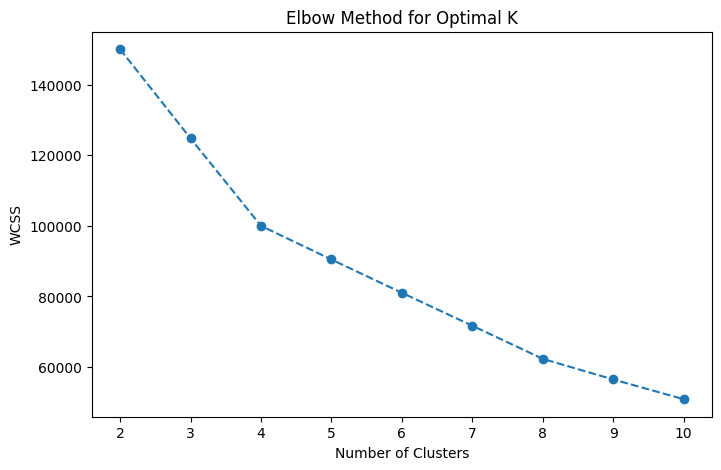

In [3]:
# Find optimal K using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


## 4️⃣ Apply K-Means Clustering

In [4]:
# Apply K-Means with optimal K
optimal_k = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Merge cluster labels with original dataset
df['Cluster'] = df_scaled['Cluster']

# Display sample of customers with cluster labels
df[['Customer_ID', 'Age', 'Purchase_Amount', 'Cluster']].head()

,Customer_ID,Age,Purchase_Amount,Cluster
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,253.26,3
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,73.19,0
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,125.62,0
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,450.32,3
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,369.28,1


## 5️⃣ Visualizing Customer Segments

* PCA(n_components=2) initializes PCA to reduce the dataset to 2 principal components (PCA1 & PCA2).
* This converts the multi-dimensional dataset into a 2D space.

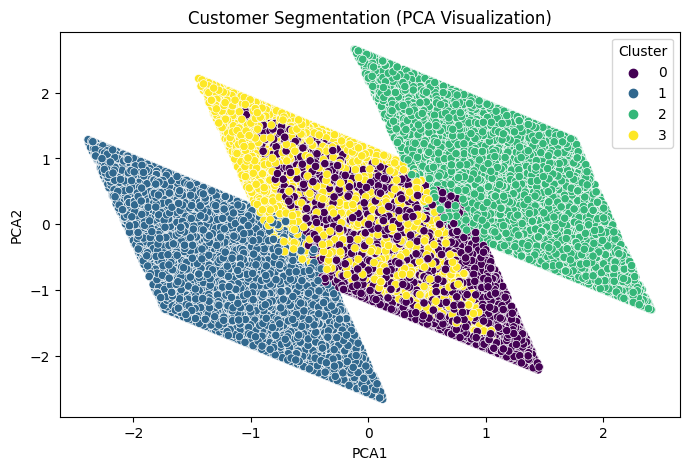

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

df_scaled['PCA1'] = pca_features[:,0]
df_scaled['PCA2'] = pca_features[:,1]

# Scatter plot of clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_scaled, palette='viridis')
plt.title('Customer Segmentation (PCA Visualization)')
plt.show()

This shows how customers are grouped into different segments based on their shopping behaviors.

## 📊 Why Do We Use PCA Here?
* Data Visualization:
K-Means clustering works on high-dimensional data, but we can’t plot multiple dimensions easily.PCA reduces the data to 2D, allowing us to visualize clusters.
* Feature Reduction:
PCA removes redundant information while preserving important relationships.Helps in faster computation and better interpretation.


# 📊 Business Insights
1️⃣ **High-Spending Repeat Customers (Cluster 0)** → Offer exclusive loyalty rewards.  
2️⃣ **Discount-Sensitive Shoppers (Cluster 1)** → Target with promotional emails.  
3️⃣ **Budget-Conscious Shoppers (Cluster 2)** → Recommend affordable product bundles.  
4️⃣ **Occasional High-Spenders (Cluster 3)** → Use retargeting ads for engagement.  

## 💡 Business Recommendations:
- Use personalized discounts based on **customer spending behavior**.
- Implement **category-based recommendations** for specific segments.
- Optimize **payment methods** based on customer preferences.


## 🔥 Next Steps

* Try Hierarchical Clustering for deeper insights.
* Apply RFM Segmentation (Recency, Frequency, Monetary Value) for purchase behavior.
* Build predictive models to classify customers in real-time.


